# [E-12] 문자를 읽을 수 있는 딥러닝

## 00. Import

In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import keras_ocr
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 

import pytesseract
from PIL import Image
from pytesseract import Output

import warnings
warnings.filterwarnings("ignore")

## 01. Data

In [2]:
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/books'
books = os.listdir(img_dir)
books

['x9780198788607.jpg',
 'l9788964356975.jpg',
 'x9780735278516.jpg',
 'x9780471317166.jpg',
 'x9780060959470.jpg',
 'x9781455563920.jpg',
 'x9781118944523.jpg',
 'l9780312561123.jpg',
 'l9781250231987.jpg',
 'l9780525657743.jpg',
 'l9780385496490.jpg',
 'x9780345539434.jpg',
 'x9780374201234.jpg',
 'x9780316194761.jpg',
 'l9781786892737.jpg',
 'x9781492032649.jpg',
 'l9780062683632.jpg',
 'l9781501160349.jpg',
 'l9788956359786.jpg',
 'l9780446310789.jpg']

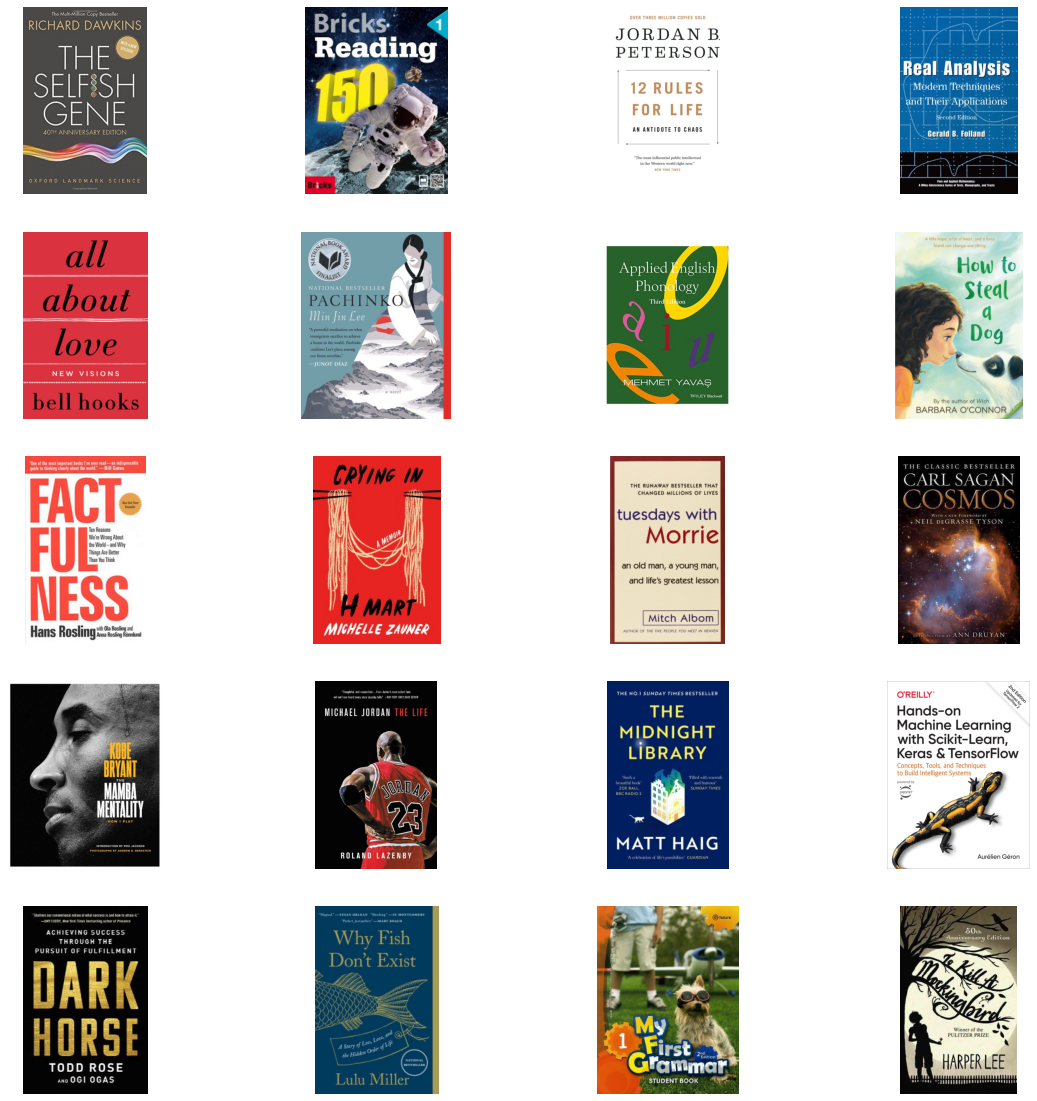

In [3]:
plt.figure(figsize=(20,20))

for idx, im in enumerate(books):
    im =  img_dir +'/'+ im
    plt.subplot(5, 4, idx+1)
    im = img.imread(im)
    plt.imshow(im)
    plt.axis('off')

## 02. OCR

### 02.1 Google-OCR

In [4]:
# Google-OCR
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/supple-cubist-352717-54ed6c748dee.json'

def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

total 99448
-rw-r--r-- 1 root root 16974384 Jun  1 16:01  best_model.h5
-rw-r--r-- 1 root root 66189416 Jun  2 15:45  best_model_ko.h5
-rw-r--r-- 1 root root    36276 Apr 21 18:31 '[E-01]classification.ipynb'
-rw-r--r-- 1 root root  1614222 May  2 05:51 '[E-02]LinearRegression.ipynb'
-rw-r--r-- 1 root root   979571 Apr 29 03:52 '[E-03]TimeSeries.ipynb'
-rw-r--r-- 1 root root  2130220 May 11 06:06 '[E-04]KaggleHousePricePrediction.ipynb'
-rw-r--r-- 1 root root   198079 May 13 17:51 '[E-05] RockScissorPaper.ipynb'
-rw-r--r-- 1 root root    89853 May 13 16:06 '[E-06] AILyrics.ipynb'
-rw-r--r-- 1 root root   153122 May 17 16:58 '[E-07] NewsSummary.ipynb'
-rw-r--r-- 1 root root  1783637 May 19 16:19 '[E-08]CameraSticker.ipynb'
-rw-r--r-- 1 root root   242146 Jun  3 02:28 '[E-09]MovieReview.ipynb'
-rw-r--r-- 1 root root  7602255 May 26 07:58 '[E-10]Portrait.ipynb'
-rw-r--r-- 1 root root    43618 Jun  7 06:17 '[E-11]Chatbot.ipynb'
-rw-r--r-- 1 root root  3752209 Jun  9 07:13 '[E-12]ReadCharac

[x9780198788607.jpg]


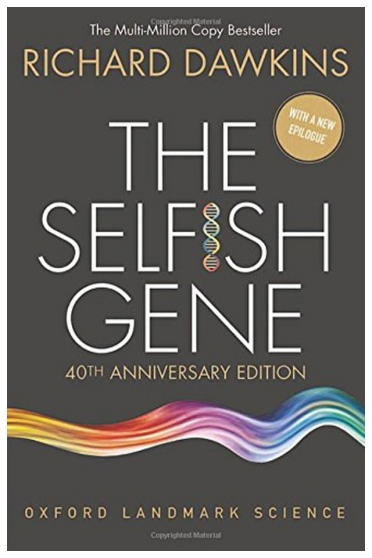

Texts:

"sted Material
The Multi-Million Copy Bestseller
RICHARD DAWKINS
WITH A NEW
EPILOGUE
THE
SELFISH
GENE
40TH ANNIVERSARY EDITION
OXFORD LANDMARK SCIENCE
Copyrighted Material"

"sted"

"Material"

"The"

"Multi"

"-"

"Million"

"Copy"

"Bestseller"

"RICHARD"

"DAWKINS"

"WITH"

"A"

"NEW"

"EPILOGUE"

"THE"

"SELFISH"

"GENE"

"40TH"

"ANNIVERSARY"

"EDITION"

"OXFORD"

"LANDMARK"

"SCIENCE"

"Copyrighted"

"Material"

[l9788964356975.jpg]


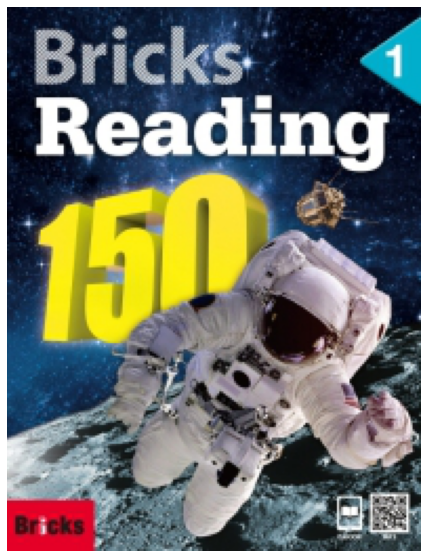

Texts:

"Bricks
Reading
150
Bricks"

"Bricks"

"Reading"

"150"

"Bricks"



In [5]:
for idx, book in enumerate(books):
    if idx < 2:
        print(f'[{book}]')
        plt.figure(figsize=(10,10))
        plt.imshow(img.imread(img_dir+'/'+book))
        plt.axis('off')
        plt.show()
        detect_text(os.path.join(img_dir, book))
        print()

### 02.2 keras-OCR

In [6]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
# 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러온다.
pipeline = keras_ocr.pipeline.Pipeline()

images = [keras_ocr.tools.read(os.path.join(img_dir, book)) for book in books]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, book)]) for book in books]

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


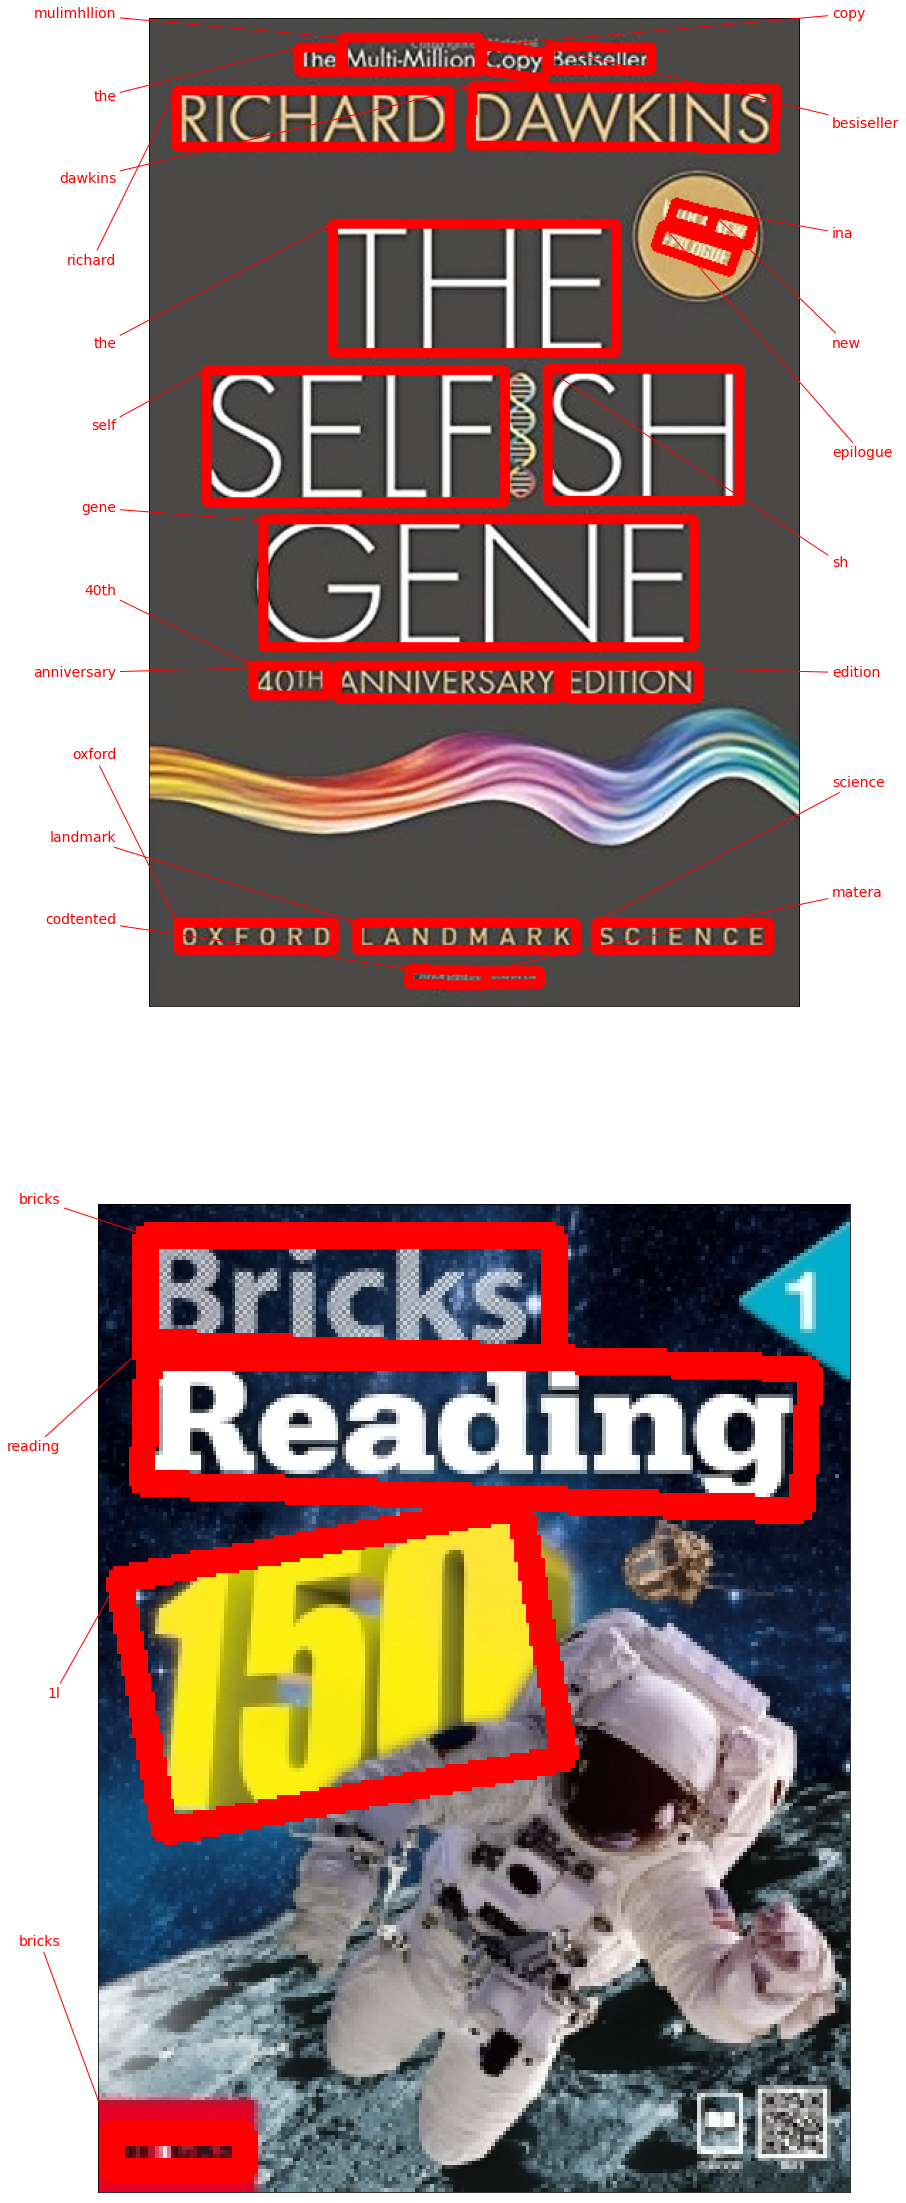

In [7]:
# Plot the predictions
fig, axs = plt.subplots(nrows=2, figsize=(40, 40))
for idx, ax in enumerate(axs):
    if idx <2:
        keras_ocr.tools.drawAnnotations(image=images[idx], 
                                        predictions=prediction_groups[idx][0], ax=ax)

### 02.3 Tesseract

In [12]:
def recognize_images(image_path='./images/sample.png', output_path='./sample'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print('================================================\n')

[x9780198788607.jpg]


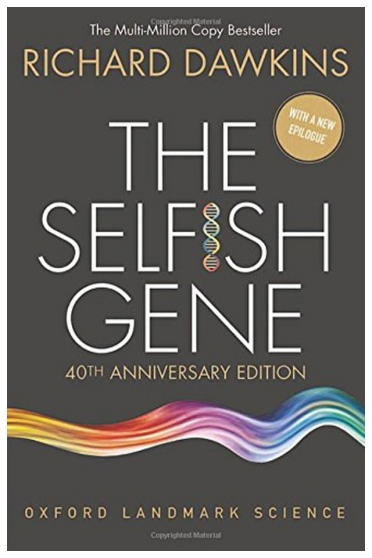

RICHARD

DYAWAYA GINES

THE @

SIELFSS/5


te. GS sae ae.

ES

SCIENCE


[l9788964356975.jpg]


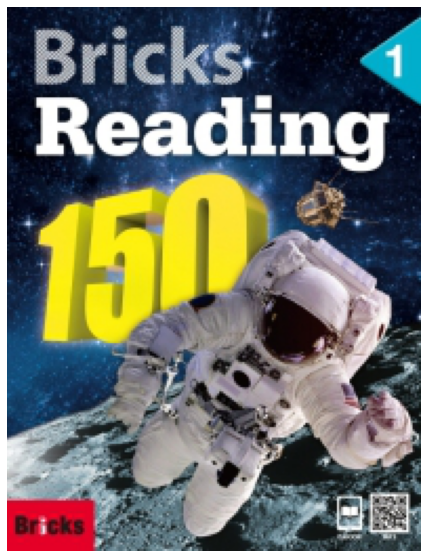

Cannot recognize characters from l9788964356975.jpg
[x9780735278516.jpg]


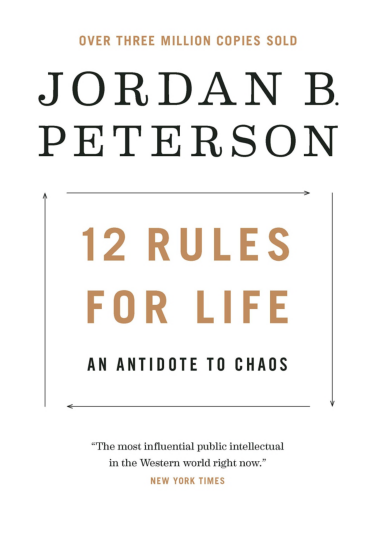

OVER

THREE

VIILLION

COPIES

SOLD

JORDAN

B

PHTRRSON


12

RULES

-F()R

Big:

AN

ANTIDOTE

TO

CHAOS

$$

“The

most

influential

public

intellectual

in

the

Western

world

right

now.

NE VW

YORA

TIMES




In [14]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/books/'

for idx, book in enumerate(books):
    if idx <3:
        print(f'[{book}]')
        plt.figure(figsize=(10,10))
        plt.imshow(img.imread(img_dir+'/'+book))
        plt.axis('off')
        plt.show()
        try:
            recognize_images(os.path.join(img_dir, book), save_dir)
        except:
            print(f'Cannot recognize characters from {book}')


## 03. 비교

In [16]:
def compare_ocr(book):
    print('[keras-ocr]')
    idx = books.index(book)
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print('================================================\n')
    print('[Tesseract]')
    try:
        recognize_images(os.path.join(img_dir, book), save_dir)
    except:
        print(f'Cannot recognize characters from {book}')


    print('================================================\n')
    print('[Google]')
    detect_text(os.path.join(img_dir, book))
    print('================================================\n')

[keras-ocr]


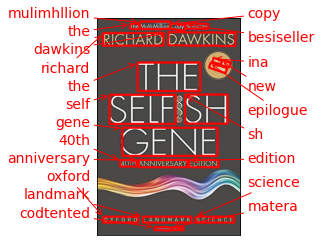


[Tesseract]
RICHARD

DYAWAYA GINES

THE @

SIELFSS/5


te. GS sae ae.

ES

SCIENCE



[Google]
Texts:

"sted Material
The Multi-Million Copy Bestseller
RICHARD DAWKINS
WITH A NEW
EPILOGUE
THE
SELFISH
GENE
40TH ANNIVERSARY EDITION
OXFORD LANDMARK SCIENCE
Copyrighted Material"

"sted"

"Material"

"The"

"Multi"

"-"

"Million"

"Copy"

"Bestseller"

"RICHARD"

"DAWKINS"

"WITH"

"A"

"NEW"

"EPILOGUE"

"THE"

"SELFISH"

"GENE"

"40TH"

"ANNIVERSARY"

"EDITION"

"OXFORD"

"LANDMARK"

"SCIENCE"

"Copyrighted"

"Material"

[keras-ocr]


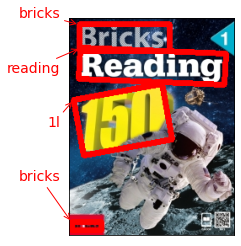


[Tesseract]
Cannot recognize characters from l9788964356975.jpg

[Google]
Texts:

"Bricks
Reading
150
Bricks"

"Bricks"

"Reading"

"150"

"Bricks"

[keras-ocr]


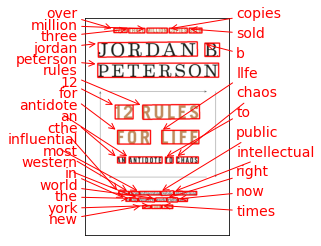


[Tesseract]
OVER

THREE

VIILLION

COPIES

SOLD

JORDAN

B

PHTRRSON


12

RULES

-F()R

Big:

AN

ANTIDOTE

TO

CHAOS

$$

“The

most

influential

public

intellectual

in

the

Western

world

right

now.

NE VW

YORA

TIMES



[Google]
Texts:

"OVER THREE MILLION COPIES SOLD
JORDAN B
PETERSON
12 RULES
FOR LIFE
AN ANTIDOTE TO CHAOS
"The most influential public intellectual
in the Western world right now."
NEW YORK TIMES"

"OVER"

"THREE"

"MILLION"

"COPIES"

"SOLD"

"JORDAN"

"B"

"PETERSON"

"12"

"RULES"

"FOR"

"LIFE"

"AN"

"ANTIDOTE"

"TO"

"CHAOS"

"""

"The"

"most"

"influential"

"public"

"intellectual"

"in"

"the"

"Western"

"world"

"right"

"now"

"."

"""

"NEW"

"YORK"

"TIMES"

[keras-ocr]


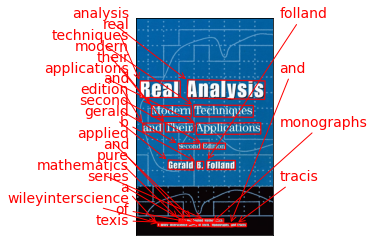


[Tesseract]
\Wiaretsyaal

Techniques

and! theirApplications

Second

Kdition

7 amas = = , |



[Google]
Texts:

"Real Analysis
Modern Techniques
and Their Applications
Second Edition
Gerald B. Folland
Pure and Applied Mathematics:
A Wiley-Interscience Series of Texts, Monographs, and Tracts"

"Real"

"Analysis"

"Modern"

"Techniques"

"and"

"Their"

"Applications"

"Second"

"Edition"

"Gerald"

"B."

"Folland"

"Pure"

"and"

"Applied"

"Mathematics"

":"

"A"

"Wiley"

"-"

"Interscience"

"Series"

"of"

"Texts"

","

"Monographs"

","

"and"

"Tracts"

[keras-ocr]


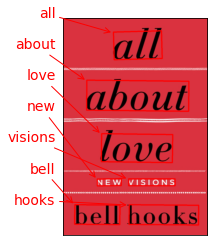


[Tesseract]
all



“TTT TT heheh As eee TT Te eee a aaa eee eee a


=


wu




eon

VISIONS

bell

hooks



[Google]
Texts:

"all
about
love
NEW VISIONS
bell hooks
***********.."

"all"

"about"

"love"

"NEW"

"VISIONS"

"bell"

"hooks"

"***********"

".."

[keras-ocr]


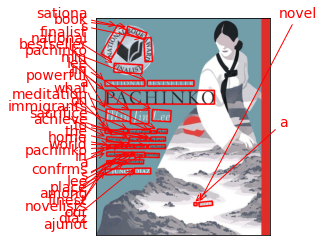


[Tesseract]



[Google]
Texts:

"BOOK
NATIONAL
AWARD
FINALIST
NATIONAL BESTSELLER
PACHINKO
Min Jin Lee
"A powerful meditation on what
immigrants sacrifice to achieve
a home in the world. Pachinko
confirms Lee's place among
our finest novelists."
-JUNOT DÍAZ
a novel"

"BOOK"

"NATIONAL"

"AWARD"

"FINALIST"

"NATIONAL"

"BESTSELLER"

"PACHINKO"

"Min"

"Jin"

"Lee"

"""

"A"

"powerful"

"meditation"

"on"

"what"

"immigrants"

"sacrifice"

"to"

"achieve"

"a"

"home"

"in"

"the"

"world"

"."

"Pachinko"

"confirms"

"Lee's"

"place"

"among"

"our"

"finest"

"novelists"

"."

"""

"-JUNOT"

"DÍAZ"

"a"

"novel"

[keras-ocr]


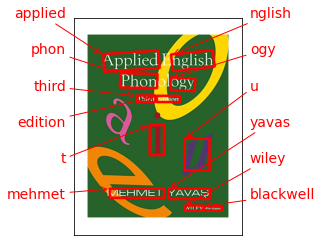


[Tesseract]
Applied

Bnglish

Phon@logy


Third

Tele

MAE IVE |

YAVAS

WILEY

a

"4




[Google]
Texts:

"Applied English
Phonology
Third Edition
a
MEHMET YAVAŞ
WILEY Blackwell"

"Applied"

"English"

"Phonology"

"Third"

"Edition"

"a"

"MEHMET"

"YAVAŞ"

"WILEY"

"Blackwell"

[keras-ocr]


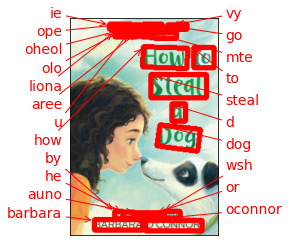


[Tesseract]
How

{oc

Steal

q

Dog

hs

og

\


“é

7

Co

Vyich

r



[Google]
Texts:

"A little hope, a lot of heart, and a furry
friend can change everything
How to
Steal
q
Dog
By the author of Wish
BARBARA O'CONNOR"

"A"

"little"

"hope"

","

"a"

"lot"

"of"

"heart"

","

"and"

"a"

"furry"

"friend"

"can"

"change"

"everything"

"How"

"to"

"Steal"

"q"

"Dog"

"By"

"the"

"author"

"of"

"Wish"

"BARBARA"

"O'CONNOR"

[keras-ocr]


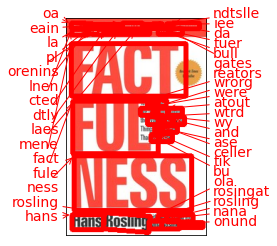


[Tesseract]
Hans

; Rosling

it a



[Google]
Texts:

""One of the most important books I've ever read-an indispensable
guide to thinking clearly about the world." -Bill Gates
FACTⓇ
FUL
NESS
Ten Reasons
We're Wrong About
the World-and Why
Things Are Better
Than You Think
Hans Rosling
with Ola Rosling and
Anna Rosling Rönnlund"

"""

"One"

"of"

"the"

"most"

"important"

"books"

"I've"

"ever"

"read"

"-"

"an"

"indispensable"

"guide"

"to"

"thinking"

"clearly"

"about"

"the"

"world"

"."

"""

"-Bill"

"Gates"

"FACTⓇ"

"FUL"

"NESS"

"Ten"

"Reasons"

"We're"

"Wrong"

"About"

"the"

"World"

"-"

"and"

"Why"

"Things"

"Are"

"Better"

"Than"

"You"

"Think"

"Hans"

"Rosling"

"with"

"Ola"

"Rosling"

"and"

"Anna"

"Rosling"

"Rönnlund"

[keras-ocr]


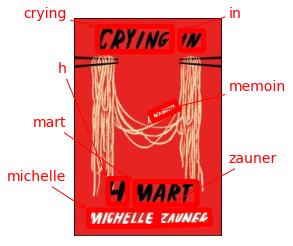


[Tesseract]
v

AAA LL



[Google]
Texts:

"CRYING IN
MEMOIR
H MART
MICHELLE ZAUNER"

"CRYING"

"IN"

"MEMOIR"

"H"

"MART"

"MICHELLE"

"ZAUNER"

[keras-ocr]


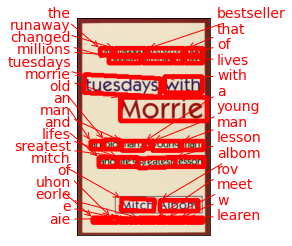


[Tesseract]
TRE

RUNAWAY

SBESISELLER

MAT

CHANGED

MILLIONS

OF

LIVES

tuesdays

WIth

Morrie

>a

Od

ict,

co

yOuns

Man,

and

res

greatest

iesson


Mitcn

Albom



Neen

=



[Google]
Texts:

"THE RUNAWAY BESTSELLER THAT
CHANGED MILLIONS OF LIVES
tuesdays with
Morrie
an old man, a young man,
and life's greatest lesson
Mitch Albom
AUTHOR OF THE FIVE PEOPLE YOU MEET IN HEAVEN"

"THE"

"RUNAWAY"

"BESTSELLER"

"THAT"

"CHANGED"

"MILLIONS"

"OF"

"LIVES"

"tuesdays"

"with"

"Morrie"

"an"

"old"

"man"

","

"a"

"young"

"man"

","

"and"

"life's"

"greatest"

"lesson"

"Mitch"

"Albom"

"AUTHOR"

"OF"

"THE"

"FIVE"

"PEOPLE"

"YOU"

"MEET"

"IN"

"HEAVEN"

[keras-ocr]


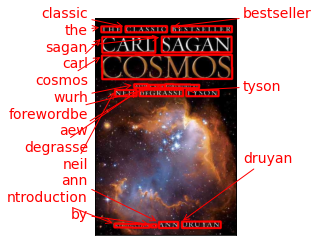


[Tesseract]
THE

‘Gre OF. Se. en. ee

BES TSELLER

SUSE

Sra)

COSMO

With

A NEW Fl

REWORD BY

.

ase ee

DEGRASSE

TYSON

, , ,



[Google]
Texts:

"THE CLASSIC BESTSELLER
CARL SAGAN
COSMOS
WITH A NEW FOREWORD BY
NEIL DEGRASSE TYSON
INTRODUCTION BY ANN DRUYAN"

"THE"

"CLASSIC"

"BESTSELLER"

"CARL"

"SAGAN"

"COSMOS"

"WITH"

"A"

"NEW"

"FOREWORD"

"BY"

"NEIL"

"DEGRASSE"

"TYSON"

"INTRODUCTION"

"BY"

"ANN"

"DRUYAN"

[keras-ocr]


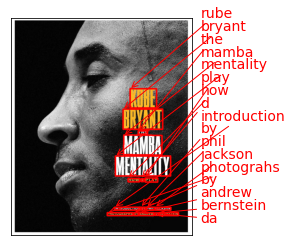


[Tesseract]
INTRODUCTION

=

-ae tie

1c

sie),

aL®.

SY ANDRE VV

1) BERNSTEIN

1



[Google]
Texts:

"KOBE
BRYANT
THE
MAMBA
MENTALITY
HOW I PLAY
INTRODUCTION BY PHIL JACKSON
PHOTOGRAPHS BY ANDREW D. BERNSTEIN"

"KOBE"

"BRYANT"

"THE"

"MAMBA"

"MENTALITY"

"HOW"

"I"

"PLAY"

"INTRODUCTION"

"BY"

"PHIL"

"JACKSON"

"PHOTOGRAPHS"

"BY"

"ANDREW"

"D."

"BERNSTEIN"

[keras-ocr]


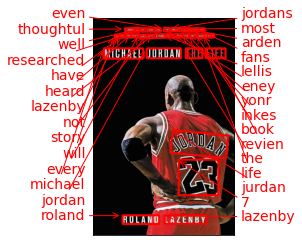


[Tesseract]
eat Eh

TTR Lieb iee i enial


Diam alld

PUR Revie

ey

tee

1 AZENBY

SP



[Google]
Texts:

""Thoughtful, well researched.... Even Jordan's most ardent fans
will not have heard every story Lazenby tells." -NEW YORK TIMES BOOK REVIEW
MICHAEL JORDAN THE LIFE
JORDAN
23
ROLAND LAZENBY"

"""

"Thoughtful"

","

"well"

"researched"

"...."

"Even"

"Jordan's"

"most"

"ardent"

"fans"

"will"

"not"

"have"

"heard"

"every"

"story"

"Lazenby"

"tells"

"."

"""

"-NEW"

"YORK"

"TIMES"

"BOOK"

"REVIEW"

"MICHAEL"

"JORDAN"

"THE"

"LIFE"

"JORDAN"

"23"

"ROLAND"

"LAZENBY"

[keras-ocr]


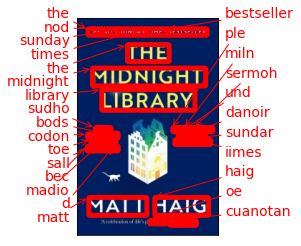


[Tesseract]
THE

MIDNIGHT

HT

LIBRARY

-.

weve

mathe

ore |

toe



[Google]
Texts:

"THE NO.1 SUNDAY TIMES BESTSELLER
THE
MIDNIGHT
LIBRARY
Such a
beautiful book
ZOE BALL,
BBC RADIO 2
Filled with warmth
and humour
SUNDAY TIMES
MATT HAIG
A celebration of life's possibilites GUARDIAN"

"THE"

"NO.1"

"SUNDAY"

"TIMES"

"BESTSELLER"

"THE"

"MIDNIGHT"

"LIBRARY"

"Such"

"a"

"beautiful"

"book"

"ZOE"

"BALL"

","

"BBC"

"RADIO"

"2"

"Filled"

"with"

"warmth"

"and"

"humour"

"SUNDAY"

"TIMES"

"MATT"

"HAIG"

"A"

"celebration"

"of"

"life's"

"possibilites"

"GUARDIAN"

[keras-ocr]


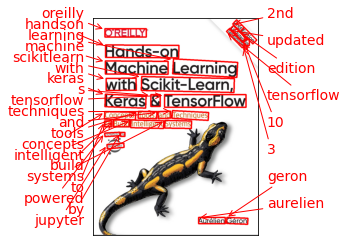


[Tesseract]
DT


O'REILLY’


HAaNAS-ONn

Machine

Learning

with

scikit-Learn,

Karas

&

TensorFlow

Concepts,

Tools.

and

Techniques

tO

Build

intelligent

Systems

(Fy

oweret

fp : we gt


i =

Be

Aurelien

(seron

ne




[Google]
Texts:

"Updated for
2nd Edition
TensorFlow 2
O'REILLYⓇ
Hands-on
Machine Learning
with Scikit-Learn,
Keras & TensorFlow
Concepts, Tools, and Techniques
to Build Intelligent Systems
powered by
Jupyter™
Aurélien Géron"

"Updated"

"for"

"2nd"

"Edition"

"TensorFlow"

"2"

"O'REILLYⓇ"

"Hands"

"-"

"on"

"Machine"

"Learning"

"with"

"Scikit"

"-"

"Learn"

","

"Keras"

"&"

"TensorFlow"

"Concepts"

","

"Tools"

","

"and"

"Techniques"

"to"

"Build"

"Intelligent"

"Systems"

"powered"

"by"

"Jupyter"

"™"

"Aurélien"

"Géron"

[keras-ocr]


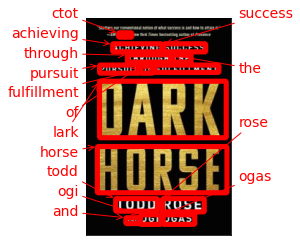


[Tesseract]
ALHIEVING SULLESS

THROUGH

ia.ea

PURSUI!I OF

Ste Stas Fs. Be

ay


it



[Google]
Texts:

"Shatters our conventional notion of what success is and how to attain
-AMY CUDDY, New York Times bestsetting author of Presence
ACHIEVING SUCCESS
THROUGH THE
PURSUIT OF FULFILLMENT
DARK
HORSE
TODD ROSE
AND OGI OGAS"

"Shatters"

"our"

"conventional"

"notion"

"of"

"what"

"success"

"is"

"and"

"how"

"to"

"attain"

"-AMY"

"CUDDY"

","

"New"

"York"

"Times"

"bestsetting"

"author"

"of"

"Presence"

"ACHIEVING"

"SUCCESS"

"THROUGH"

"THE"

"PURSUIT"

"OF"

"FULFILLMENT"

"DARK"

"HORSE"

"TODD"

"ROSE"

"AND"

"OGI"

"OGAS"

[keras-ocr]


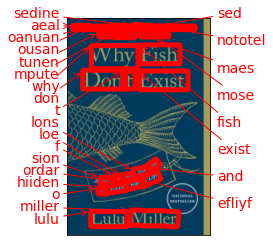


[Tesseract]
ee

W hy

Fish

lLJont

Deets



:


Lulu

Gai tas



[Google]
Texts:

""Magical"-SUSAN ORLEAN "Shocking"-SY MONTGOMERY
"Perfect, just perfect." —MARY ROACH
Why Fish
Don't Exist
A Story of Loss, Love, and
the Hidden Order of Life
Lulu Miller
NATIONAL
RESTSELLER"

"""

"Magical"

"""

"-SUSAN"

"ORLEAN"

"""

"Shocking"

"""

"-SY"

"MONTGOMERY"

"""

"Perfect"

","

"just"

"perfect"

"."

"""

"—MARY"

"ROACH"

"Why"

"Fish"

"Don't"

"Exist"

"A"

"Story"

"of"

"Loss"

","

"Love"

","

"and"

"the"

"Hidden"

"Order"

"of"

"Life"

"Lulu"

"Miller"

"NATIONAL"

"RESTSELLER"

[keras-ocr]


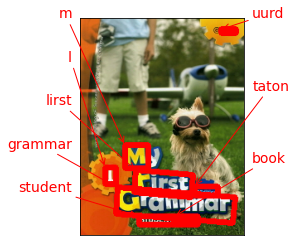


[Tesseract]



[Google]
Texts:

"future
My
1 First
Grammar
STUDENT BOOK"

"future"

"My"

"1"

"First"

"Grammar"

"STUDENT"

"BOOK"

[keras-ocr]


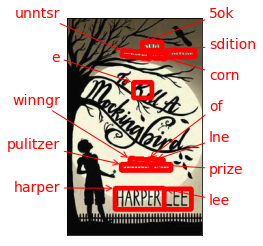


[Tesseract]
HARPER

Lee




[Google]
Texts:

"50th
Anniversary Edition
To Kill A
Mockingbir
PULITZER PRIZE
HARPER LEE"

"50th"

"Anniversary"

"Edition"

"To"

"Kill"

"A"

"Mockingbir"

"PULITZER"

"PRIZE"

"HARPER"

"LEE"



In [17]:
for book in books:
    compare_ocr(book)

## 04. 회고

- 책의 표지를 읽어보는 컨셉으로 진행을 하였다. 도서관에서 일할 때 책을 읽고 청구기호를 붙히고 찾는 것이 어려웠다. 책을 찍으면 정보를 바로 볼 수 있는 프로그램을 만들면 편할 것 같아서 책을 컨셉으로 진행하였다. 성능은 Google > keras >teseract 순으로 쓸 만했다. teseract는 시간도 많이 걸리고 글자 구분도 잘 해내지 못했다. 세부적으로는 책 표지를 읽기는 하지만 어떻게 제목 글쓴이 출판사와 같은 것을 구분해줄 수 있냐는 것이었다. 책 표지는 다양성이 많지만 책의 모서리 부분에 쓰여있는 문자 정보는 어느정도 비슷한 형식을 유지하고 있기에 사용하면 괜찮을 것 같다는 생각이 들었다.
- file 처리 문제
    - 여러 API를 쓰다보니 API별로 처리해주는 방법이 달랐다. 통일된 방향으로 함수를 만들어 처리해주고 싶었지만 어려웠다. 실제로 프로그램을 구현한다면 제대로된 한개의 API를 사용하고 싶다.
- API 구조
    - API를 쓸 때마다 느끼는 것이지만 구조를 알 수 있어야 API를 자유자재로 사용할 수 있다. 시간이 걸리더라도 API의 구조를 이해하고 사용해야한다.
- try except 구문
    - node를 마무리하고 비교하는 과정에서 에러가 많이 발생했었다. try except구문을 처리해주지않아서 오류가 계속 발생하는 것이었다. program이 돌아가게 하기위해서는 유용하게 사용해야겠다.